In [2]:
import pandas as pd
# Define a function to read .txt files
def load_data(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            text, label = line.strip().split(';')
            data.append([text, label])
    return pd.DataFrame(data, columns=['Text', 'Emotion'])
# Load all 3 files
train_df = load_data("train.txt")
test_df = load_data("test.txt")
val_df = load_data("val.txt")
# Combine them into one dataset
data = pd.concat([train_df, test_df, val_df], ignore_index=True)
# Show first few rows
print("Dataset shape:", data.shape)
data.head()

Dataset shape: (20000, 2)


,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


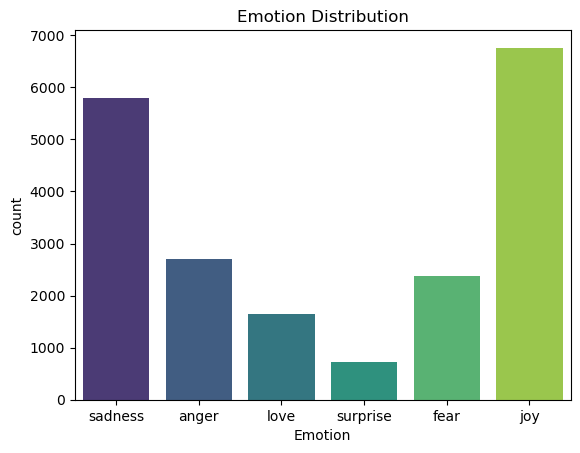

In [6]:
#Explore the Data
sns.countplot(x='Emotion', hue='Emotion', data=data, palette='viridis', legend=False)
plt.title("Emotion Distribution")
plt.show()

In [7]:
#Preprocess Text
import re
import string

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

data['Clean_Text'] = data['Text'].apply(clean_text)
data.head()

,Text,Emotion,Clean_Text
0,i didnt feel humiliated,sadness,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy,anger,i am feeling grouchy


In [8]:
#Split Data
X = data['Clean_Text']
y = data['Emotion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 16000
Testing samples: 4000


In [9]:
#Feature Extraction (TF-IDF)
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [10]:
#Train Naive Bayes Model
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)
nb_acc = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", round(nb_acc*100, 2), "%")

Naive Bayes Accuracy: 69.42 %


In [11]:
#Train Logistic Regression Model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)
y_pred_lr = lr.predict(X_test_tfidf)

lr_acc = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", round(lr_acc*100, 2), "%")

Logistic Regression Accuracy: 86.25 %


In [13]:
#Train Logistic Regression Model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)
y_pred_lr = lr.predict(X_test_tfidf)

lr_acc = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", round(lr_acc*100, 2), "%")

Logistic Regression Accuracy: 86.25 %


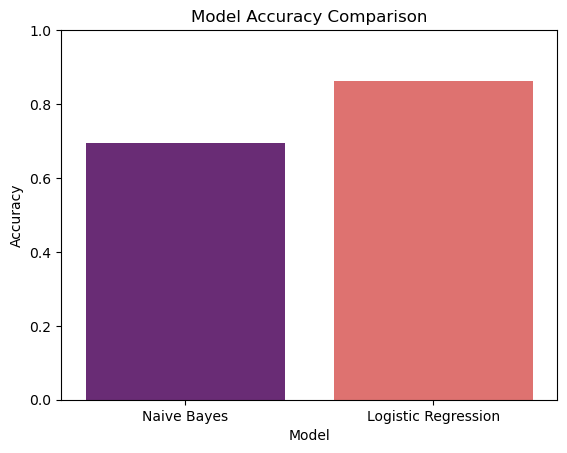

In [15]:
#Compare Models
sns.barplot(x='Model', y='Accuracy', hue='Model', data=models, palette='magma', legend=False)
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.show()

Best Model: Logistic Regression


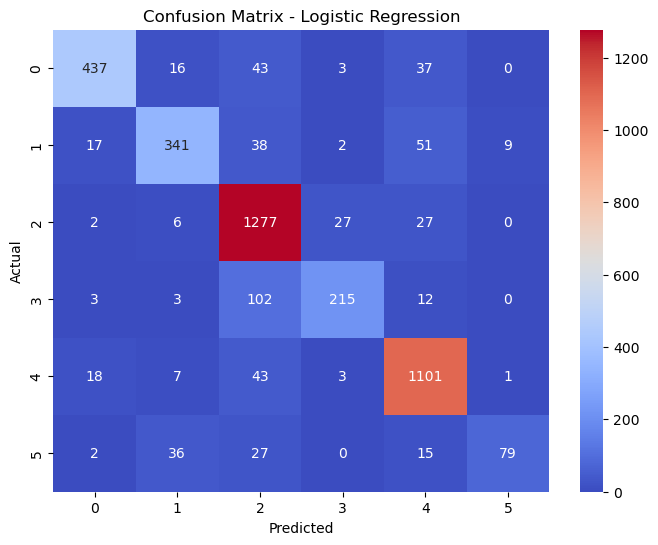

              precision    recall  f1-score   support

       anger       0.91      0.82      0.86       536
        fear       0.83      0.74      0.79       458
         joy       0.83      0.95      0.89      1339
        love       0.86      0.64      0.74       335
     sadness       0.89      0.94      0.91      1173
    surprise       0.89      0.50      0.64       159

    accuracy                           0.86      4000
   macro avg       0.87      0.77      0.80      4000
weighted avg       0.86      0.86      0.86      4000



In [16]:
#Confusion Matrix for Best Model
best_model = lr if lr_acc > nb_acc else nb
best_name = "Logistic Regression" if lr_acc > nb_acc else "Naive Bayes"
print(f"Best Model: {best_name}")

y_pred_best = best_model.predict(X_test_tfidf)

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title(f"Confusion Matrix - {best_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, y_pred_best))

In [17]:
#Test with Custom Input
def predict_emotion(text):
    cleaned = clean_text(text)
    vectorized = tfidf.transform([cleaned])
    prediction = best_model.predict(vectorized)[0]
    return prediction

# Example
user_text = "I am feeling so happy and excited today!"
print("Input Text:", user_text)
print("Predicted Emotion:", predict_emotion(user_text))


Input Text: I am feeling so happy and excited today!
Predicted Emotion: joy
